# Conjoint Analysis

In [133]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [134]:
data = pd.DataFrame()
#read the input csv 
conjoint_data= pd.read_csv("/Users/mm679j/Documents/2022-MMA831-Python/data/Conjoint.csv")

conjoint_data


,RespondantID,Brand,Cores,RAM,HardDrive,DSize,DQuality,TouchScreen,Rating
0,1,Apple,Quad Core,8 GB,256 GB,12 Inch,Normal,Yes,3
1,1,Other,Quad Core,8 GB,1024 GB,14 Inch,Normal,Yes,7
2,1,Apple,Dual Core,4GB,512 GB,14 Inch,HD,Yes,9
3,1,Ethos,Dual Core,16 GB,256 GB,12 Inch,HD,Yes,9
4,1,Asus,Quad Core,8 GB,1024 GB,15.2 Inch,Normal,No,5
...,...,...,...,...,...,...,...,...,...
3199,356,Asus,Quad Core,8 GB,1024 GB,15.2 Inch,Normal,No,6
3200,356,Other,Quad Core,4GB,256 GB,14 Inch,HD,Yes,2
3201,356,Ethos,Dual Core,16 GB,256 GB,12 Inch,HD,Yes,6
3202,356,Acer,Quad Core,4GB,256 GB,15.2 Inch,HD,No,8


In [ ]:
#explore the dataset


In [ ]:
#fit linear regression given we have rating information

In [13]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

res = 'Rating ~ Brand+Cores+RAM+HardDrive+DSize+DQuality+TouchScreen'
res = smf.ols(main_effects_model, data=conjoint_data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     30.14
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           5.27e-76
Time:                        13:15:36   Log-Likelihood:                -7478.3
No. Observations:                3204   AIC:                         1.499e+04
Df Residuals:                    3189   BIC:                         1.508e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4763      0.171     31.977      0.000       5.140       5.812
Brand[T.Apple]          1.1517      0.153      7.519      0.000       0.851       1.452
Brand[T.Asus]           1.0375      0.153      6.773      0.000       0.737       1.338
Brand[T.Ethos]          1.4757      0.153      9.634      0.000       1.175       1.776
Brand[T.Lenovo]         0.9551      0.153      6.235      0.000       0.655       1.255
Brand[T.Other]          1.4494      0.153      9.462      0.000       1.149       1.750
Cores[T.Quad Core]     -0.1130      0.088     -1.278      0.201      -0.286       0.060
RAM[T.4GB]              0.6676      0.108      6.164      0.000       0.455       0.880
RAM[T.8 GB]            -0.4700      0.108     -4.340      0.000      -0.682      -0.258
HardDrive[T.256 GB]    -0.4672      0.108     -4.314      0.000      -0.680      -0.255
HardDrive[T.512 GB]    -0.2032      0.108     -1.876      0.061      -0.416       0.009
DSize[T.14 Inch]       -0.6058      0.108     -5.593      0.000      -0.818      -0.393
DSize[T.15.2 Inch]     -0.3736      0.108     -3.449      0.001      -0.586      -0.161
DQuality[T.Normal]     -0.6373      0.088     -7.207      0.000      -0.811      -0.464
TouchScreen[T.Yes]     -0.8034      0.088     -9.084      0.000      -0.977      -0.630
==============================================================================
Omnibus:                     2091.784   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.451
Skew:                          -0.054   Prob(JB):                     8.85e-41
Kurtosis:                       1.829   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

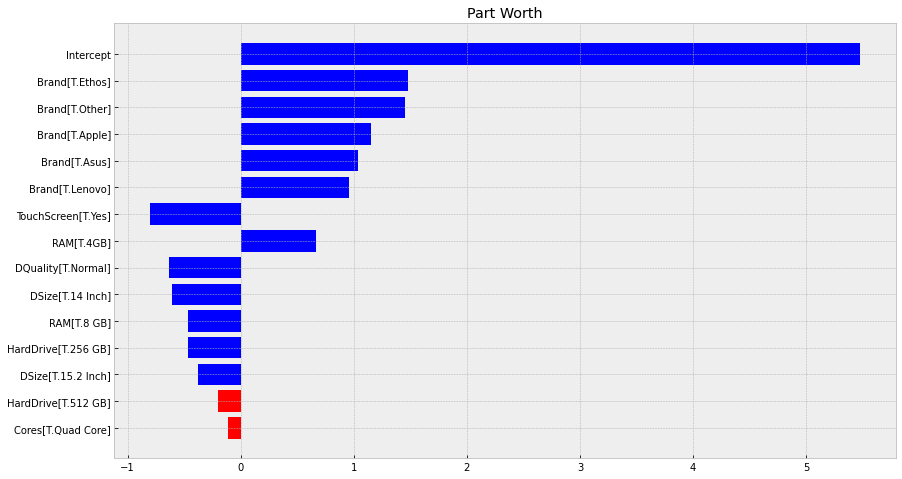

In [102]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [103]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})

df_res

,param_name,param_w,pval
Intercept,Intercept,5.476280,7.372152e-195
Brand[T.Apple],Brand[T.Apple],1.151685,7.153539e-14
Brand[T.Asus],Brand[T.Asus],1.037453,1.497254e-11
Brand[T.Ethos],Brand[T.Ethos],1.475655,1.134573e-21
Brand[T.Lenovo],Brand[T.Lenovo],0.955056,5.113479e-10
Brand[T.Other],Brand[T.Other],1.449438,5.652426e-21
Cores[T.Quad Core],Cores[T.Quad Core],-0.112984,2.014985e-01
RAM[T.4GB],RAM[T.4GB],0.667603,8.000583e-10
RAM[T.8 GB],RAM[T.8 GB],-0.470037,1.471652e-05
HardDrive[T.256 GB],HardDrive[T.256 GB],-0.467228,1.654306e-05


In [ ]:
#Next we want to aggregate by Attribute (across all levels)

In [104]:
df_res[['param_grp','param_name']] = df_res['param_name'].str.split('[', expand=True)

In [105]:
df_res

,param_name,param_w,pval,param_grp
Intercept,None,5.476280,7.372152e-195,Intercept
Brand[T.Apple],T.Apple],1.151685,7.153539e-14,Brand
Brand[T.Asus],T.Asus],1.037453,1.497254e-11,Brand
Brand[T.Ethos],T.Ethos],1.475655,1.134573e-21,Brand
Brand[T.Lenovo],T.Lenovo],0.955056,5.113479e-10,Brand
Brand[T.Other],T.Other],1.449438,5.652426e-21,Brand
Cores[T.Quad Core],T.Quad Core],-0.112984,2.014985e-01,Cores
RAM[T.4GB],T.4GB],0.667603,8.000583e-10,RAM
RAM[T.8 GB],T.8 GB],-0.470037,1.471652e-05,RAM
HardDrive[T.256 GB],T.256 GB],-0.467228,1.654306e-05,HardDrive


In [107]:
#df_ftr_imp = df_res.groupby('param_grp').sum()
#notice we want to sum ABS value, and also only include coefficients where pval <0.05

df_ftr_imp= df_res.groupby(['param_grp']).apply(lambda x: x[x['pval'] <=0.05]['param_w'].abs().sum())
print(df_ftr_imp)

param_grp
Brand          6.069288
Cores          0.000000
DQuality       0.637328
DSize          0.979401
HardDrive      0.467228
Intercept      5.476280
RAM            1.137640
TouchScreen    0.803371
dtype: float64


In [125]:
df2 = df_ftr_imp.to_frame().reset_index()
df2 = df2.rename(columns= {0: 'ftr_impr'})
df2.index.name = 'index'
df2

,param_grp,ftr_impr
index,,
0,Brand,6.069288
1,Cores,0.000000
2,DQuality,0.637328
3,DSize,0.979401
4,HardDrive,0.467228
5,Intercept,5.476280
6,RAM,1.137640
7,TouchScreen,0.803371


In [131]:
df2=df2.sort_values(by='ftr_impr', ascending=True)

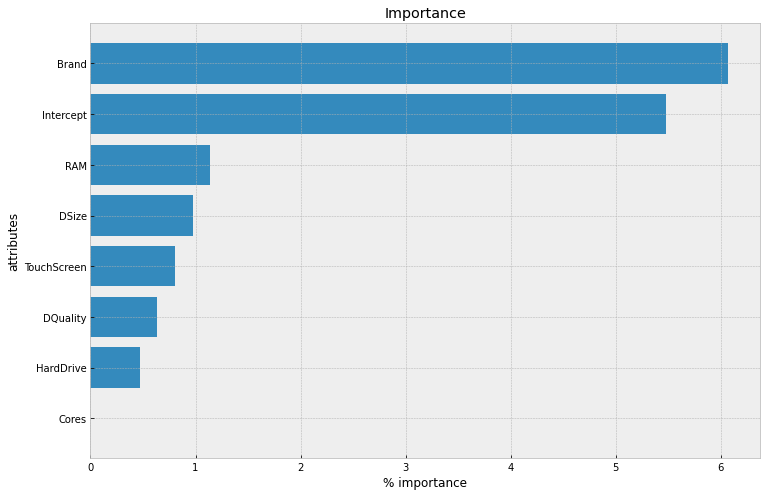

In [132]:
f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(df2['ftr_impr']))

plt.title('Importance')
plt.barh(xbar, df2['ftr_impr'])
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, df2['param_grp'])
plt.show()